# ISLR- Python: Ch3 -- Applied Question 9

This question involves the use of multiple linear regression on the `Auto` data set.

In [2]:
# perform standard imports
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib

matplotlib.rcParams['figure.figsize'] = (13.0, 6.0)

from matplotlib import pyplot as plt
from pandas.tools.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import probplot

from statsmodels.stats.outliers_influence import OLSInfluence


sns.set_style('whitegrid')
sns.set_context('talk')

%matplotlib inline

In [3]:
df = pd.read_csv('../data/Auto.csv')
df = pd.read_csv('../data/Auto.csv', na_values='?').dropna()


In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


## (a) Produce a scatterplot matrix which includes all of the variables in the data set.

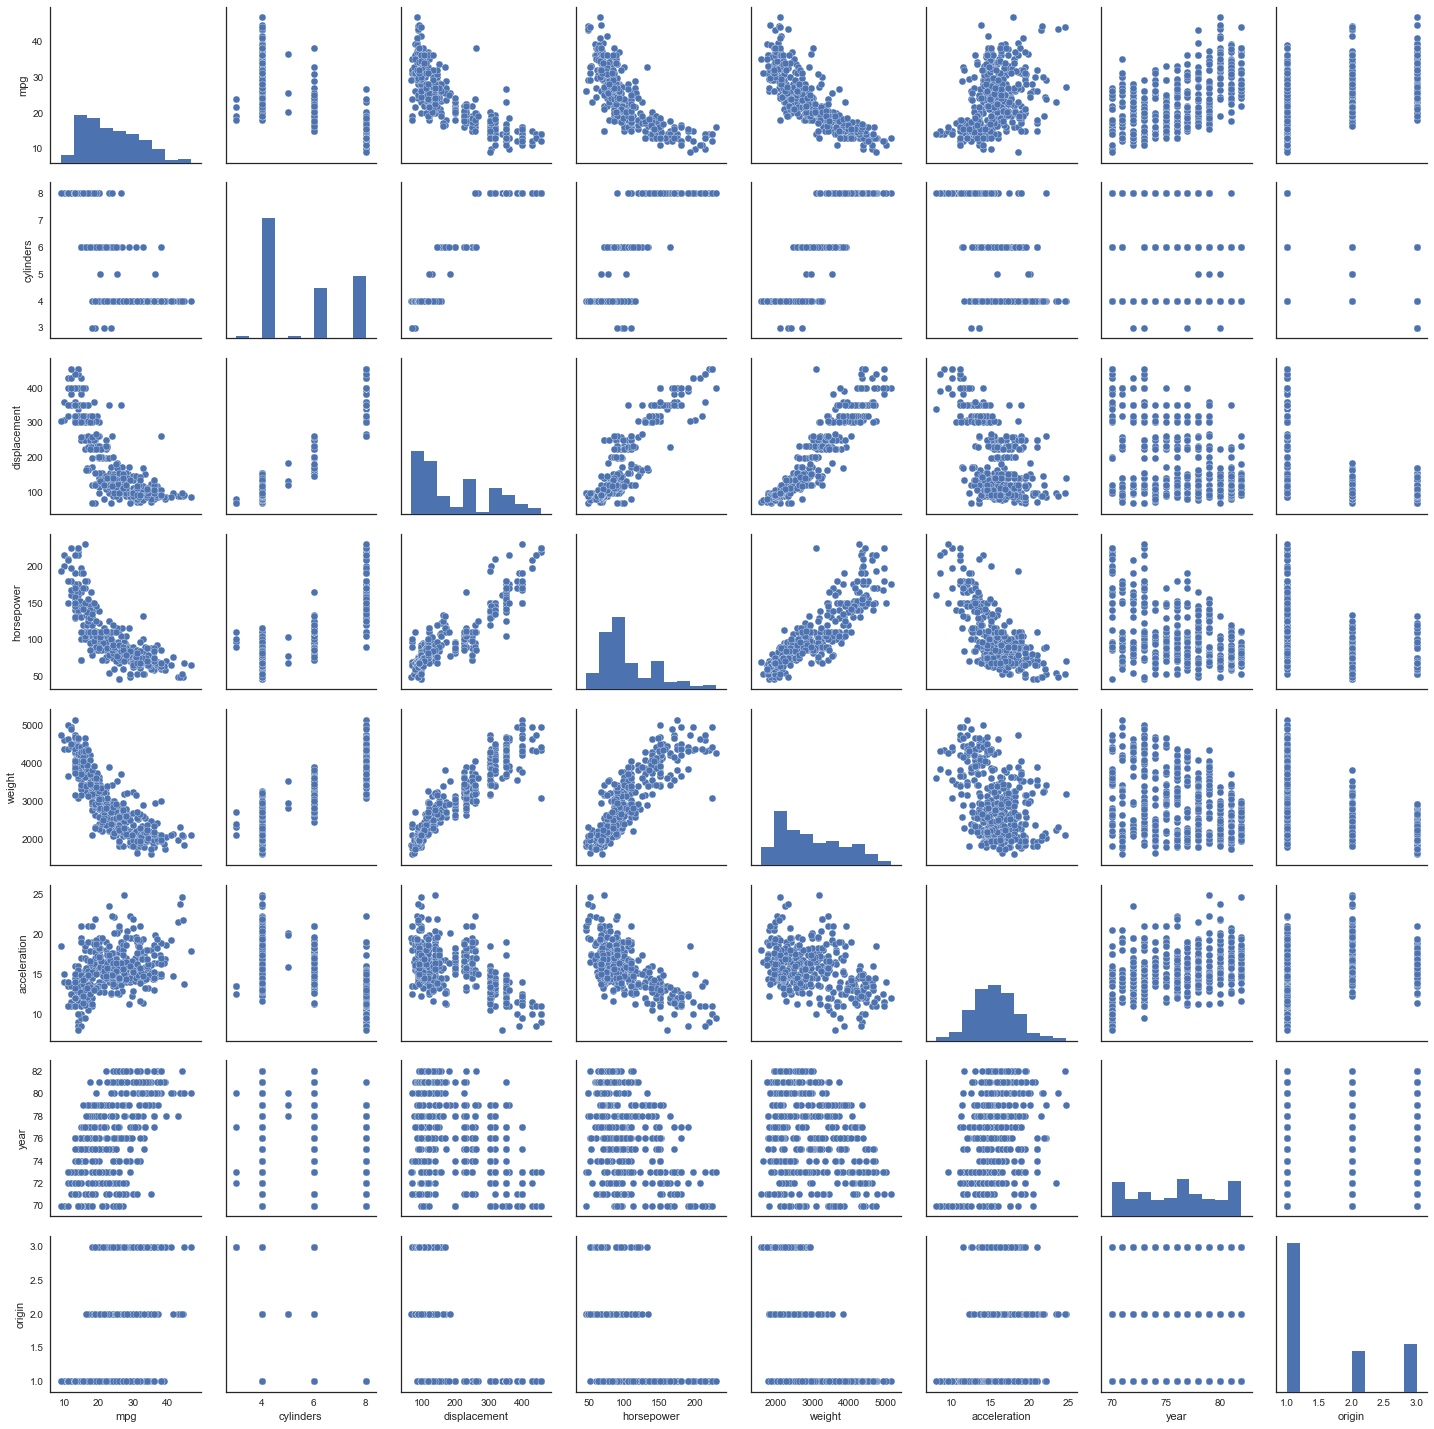

In [25]:
sns.pairplot(df)

## (b) Compute the matrix of correlations between the variables using the function `corr()`. 

In [26]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


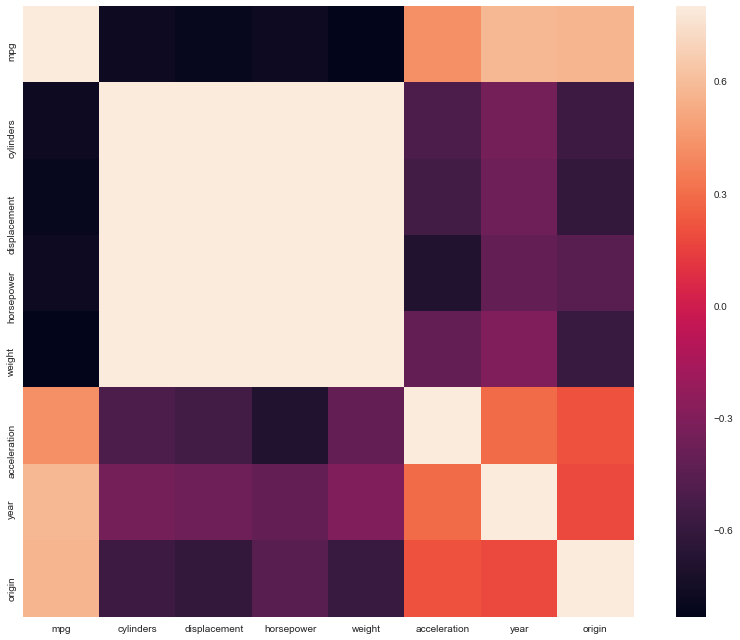

In [27]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
f.tight_layout()

## (c) Perform a multiple linear regression with mpg as the response and all other variables except name as the predictors.

Use the summary() function to print the results. Comment on the output. For instance:
1. Is there a relationship between the predictors and the response?
2. Which predictors appear to have a statistically significant relationship to the response?
3. What does the coefficient for the year variable suggest?

In [24]:
model=smf.ols('mpg~cylinders + displacement + horsepower + weight + acceleration + year + origin',df)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 30 May 2019   Prob (F-statistic):          2.04e-139
Time:                        22:55:50   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 ## i 
Yes, there is a relationship between the predictors and the response. In the table above we can see that the value of the F-statistic is 252 which is much larger than 1, so we can reject the corresponding null hypothesis:

H0:βcylinders=βdisplacement=βweight=βacceleration=βyear=βorigin=0.
In fact, the probability this data would be generated if H0 was true is Prob(F−Statistic)=2×10−139, a ridiculously low value.

## ii
We can see which predictors have a statistically significant relationship with the response by looking at the p-values in the table above. The predictors that have a statistically significant relationship to the response are definitely weight, year and origin, and we could say displacement as well; while cylinders, horsepower, and acceleration do not.

## iii
The coefficient suggests that, on average, when the other variables are held constant, an increase of one year (of production) corresponds to an increase of 0.75 of mpg (so, the more recent the more efficient).




## (d)  Produce diagnostic plots of the linear regression fit.

Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

In [40]:
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot

plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

model_f = 'mpg ~ cylinders + \
                 displacement + \
                 horsepower + \
                 weight + \
                 acceleration + \
                 year + \
                 origin'

df.reset_index(drop=True, inplace=True)

model = smf.ols(formula=model_f, data=df)

model_fit = model.fit()

# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]


## Residuals against fitted values

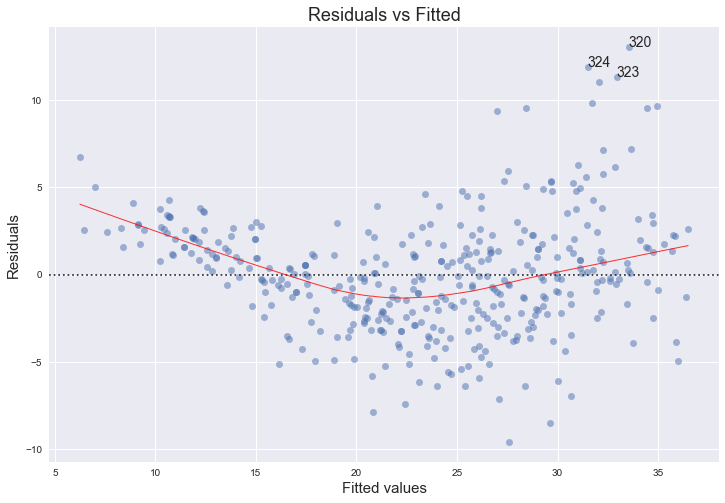

In [39]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'mpg', data=df,
                                  lowess=True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')


# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

 ## Comments 
No, there are no unusually large outliers, as per the the scale log location. They are however skewedly distributed. The larger the fitted value, the larger the variance, since the spread of the residuals increases.

No, even though there is an observation (number 13) with higher leverage, it is still well within Cook's 0.5 distance.

The normal qq-plot deviates at one extreme, which could indicate that there are other explanatory predictors that we are not considering (quadratic terms, for example). Additionally, the funnel shape of the residuals plot indicates heteroskedacity.



In [8]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## (e) Use the * and : symbols to fit linear regression models with interaction effects.

Do any interactions appear to be statistically significant?

### 1. year:origin  (Interactions between qualitative and quantitative variables)

In [54]:
model1=smf.ols('mpg~year*origin+weight+displacement',df)
model1_fit=model1.fit()
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     359.5
Date:                Fri, 31 May 2019   Prob (F-statistic):          8.65e-143
Time:                        19:29:11   Log-Likelihood:                -1021.6
No. Observations:                 392   AIC:                             2055.
Df Residuals:                     386   BIC:                             2079.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.9270      8.873      0.893      0.372      -9.519      25.373
year             0.4313      0.113      3.818      0.000       0.209       0.653
origin         -14.4936      4.707     -3.079      0.002     -23.749      -5.239
year:origin      0.2023      0.060      3.345      0.001       0.083       0.321
weight          -0.0064      0.001    -11.571      0.000      -0.007      -0.005
displacement     0.0016      0.005      0.319      0.750      -0.008       0.011
==============================================================================
Omnibus:                       38.636   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.804
Skew:                           0.584   Prob(JB):                     2.56e-16
Kurtosis:                       4.741   Cond. No.                     1.84e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Comment 
The interaction term, 'year:origin' turns out to have low p-value. 
It means that  the derivative dmpg/dyear depends on the value of origin.
The coeffient of 0.2023 can be interpreted as the increse in the effect of year on mpg for one unit increae in origin. The fact that it is positive  indicates that,in the below picture, the red line is  slightly steeper slope than the rest and, the green one is than the blue one.  Note that the origin of car is coded as interger with  1. American, 2. European, 3. Japanese

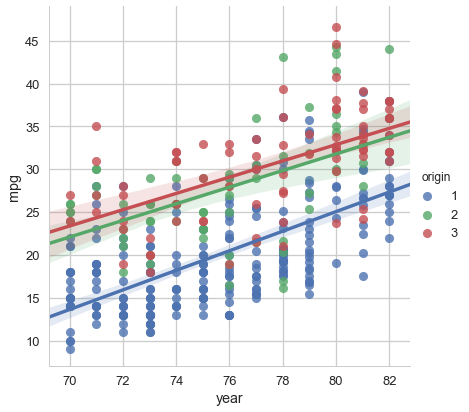

In [105]:
sns.lmplot(x="year",y="mpg",hue="origin",data=df,size=6)
plt.show()

### 2.  age:weight (Interactions between a new qualitative variable and a quantitative variable)

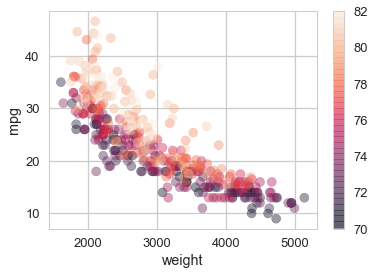

In [70]:
plt.scatter(x=df.weight,y=df.mpg,c=df.year,alpha=0.4,)
plt.colorbar()
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

Let's turn the year variable into the caterogical variable.  Before that, look at the distribution.

In [67]:
df.year.describe()

count    392.000000
mean      75.979592
std        3.683737
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: year, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


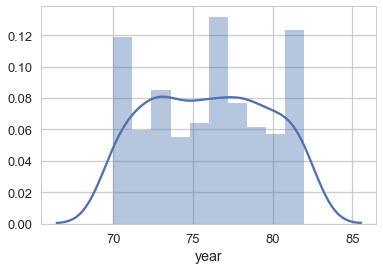

In [77]:
sns.distplot(df.year,bins=10)

In [114]:
# pd.cut?
#  qcut (quantile based cut, which ensures equal-sized bins): pandas.qcut - pandas 0.16.2 documentation
#  e.g.: pd.qcut(yourList, numberOfBins)

In [106]:
df.age=pd.cut(df.year,bins=3,labels=["old","middle","new"])
df['age']=df.age

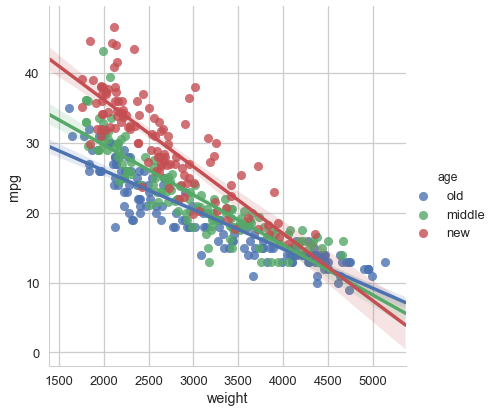

In [104]:
sns.lmplot(x="weight",y="mpg",hue="age",data=df,size=6)
plt.show()

In [110]:
model2=smf.ols('mpg~year+displacement+origin+weight*age',df)
model2_fit=model2.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     272.1
Date:                Fri, 31 May 2019   Prob (F-statistic):          7.72e-153
Time:                        21:38:01   Log-Likelihood:                -988.87
No. Observations:                 392   AIC:                             1996.
Df Residuals:                     383   BIC:                             2031.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               15.1518      9.344      1.621      0.106      -3.221      33.525
age[T.middle]            5.1871      1.524      3.403      0.001       2.190       8.184
age[T.new]              14.7191      2.033      7.241      0.000      10.722      18.716
year                     0.2628      0.129      2.034      0.043       0.009       0.517
displacement            -0.0016      0.004     -0.366      0.715      -0.010       0.007
origin                   0.9364      0.246      3.803      0.000       0.452       1.421
weight                  -0.0049      0.001     -8.864      0.000      -0.006      -0.004
weight:age[T.middle]    -0.0014      0.000     -3.270      0.001      -0.002      -0.001
weight:age[T.new]       -0.0036      0.001     -6.342      0.000      -0.005      -0.002
==============================================================================
Omnibus:                       45.386   Durbin-Watson:                   1.500
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.406
Skew:                           0.607   Prob(JB):                     5.79e-23
Kurtosis:                       5.190   Cond. No.                     2.07e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Comment
The interaction term, 'age:weight' turns out be statistically significant. It means that the derivative dmpg/dweight depends on  how old the car is relative to other cars in the data. The coeffients can be interpreted as the increse in the effect of weight on mpg for one unit increae in the age variable.

## (f) Try a few different transformations of the variables

Such as $\log(X)$, $\sqrt{X}$, $X^2$. Comment on your findings.